# Loading the Model

In [1]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')


# Creating Story by concatenating the captions and iterating

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

def generate_story(captions, model, tokenizer, max_length=50, beam_width=3, top_k=30, top_p=0.85, temperature=0.7):
    # Start the story with an introductory phrase or keep it empty
    story = ""
    for caption in captions:
        # Combine current story with the next caption to maintain context
        input_text = story + " " + caption
        inputs = tokenizer.encode(input_text.strip(), return_tensors='pt')

        # Generate the next part of the story
        outputs = model.generate(
            inputs,
            max_length=inputs.shape[1] + max_length,
            num_return_sequences=1,
            no_repeat_ngram_size=2,  # Avoid repetitive n-grams for coherence
            do_sample=True,  # Enables sampling-based generation
            top_k=top_k,  # Limits to the top k words for diversity
            top_p=top_p,  # Nucleus sampling for flexibility
            temperature=temperature,  # Controls randomness
            num_beams=beam_width  # For beam search (set >1 to enable)
        )

        # Decode the generated text and update the story
        generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
        story = generated_text

    return story

# Load a pre-trained model and tokenizer (e.g., GPT-2)
model_name = 'gpt2'  # You can change this to any compatible model name
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Example captions
captions = [
    "A group of people walking up a snowy slope.",
    "A person on a snowboard on a mountain.",
    "A man climbing up a snowy mountain.",
    "A man standing on top of a mountain.",
    "A man sitting on top of a snowy mountain."
]

# Generate and print the story
print(generate_story(captions, model, tokenizer))


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

A group of people walking up a snowy slope.

"This is the first time I've ever seen anything like this," he said. "I've never seen this kind of thing before." A person on a snowboard on a mountain. A man who has never been to a ski resort. And a woman who is a member of the U.S. Forest Service, who was on her way to the summit when she was hit by a car. All of these things are happening in A man climbing up a snowy mountain. They're all happening at the same time. It's not just a matter of snowboarding, it's also about the safety of those who are on the mountain, and how they're going to protect themselves from the dangers that are coming their way. A man standing on top of a mountain. He's trying to get to his feet, but he can't get up, so he's on his own. There's a lot more to it than that. That's why I'm here. I want to make sure that people are safe. A man sitting on top of a snowy mountain. This is not a place where you can just sit there and say, 'Oh my God, this is dangerous.' Y

# Create story by transition phrasing and iterating

In [6]:
from transformers import AutoModelForCausalLM, AutoTokenizer

def generate_story(captions, model, tokenizer, max_length=50, beam_width=3, top_k=30, top_p=0.85, temperature=0.7):
    # Start with an initial prompt to set the stage for the story
    story = ""
    
    for caption in captions:
        # Construct the input by combining the current story and caption with transition phrasing
        input_text = f"{story} {caption}. What happened next was"
        inputs = tokenizer.encode(input_text.strip(), return_tensors='pt')

        # Generate continuation based on the current input
        outputs = model.generate(
            inputs,
            max_length=inputs.shape[1] + max_length,
            num_return_sequences=1,
            no_repeat_ngram_size=2,
            do_sample=True,
            top_k=top_k,
            top_p=top_p,
            temperature=temperature,
            num_beams=beam_width
        )

        # Decode the generated text and trim redundant parts
        generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
        
        # Keep only the new content that was generated, omitting the input portion
        new_content = generated_text[len(input_text):].strip()
        
        # Combine the new content with the existing story
        story = story + " " + new_content

    return story.strip()

# Load a pre-trained model and tokenizer (e.g., GPT-2)
model_name = 'gpt2'  # You can change this to other models like 'gpt-neo' or 'gpt-j'
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Example captions
captions = [
    "A group of people walking up a snowy slope",
    "A person on a snowboard on a mountain",
    "A man climbing up a snowy mountain",
    "A man standing on top of a mountain",
    "A man sitting on top of a snowy mountain"
]

# Generate and print the story
print(generate_story(captions, model, tokenizer))


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

a bit of a mystery.

"I was walking down the slope, and I saw a bunch of guys coming up the other side of the hill. And I thought, 'What the hell is going on?' And then I looked up and that I was in the middle of an avalanche. I didn't know what to do, but I knew I had to get out of there. So I did," he said. "And that's when I realized that there was no way I could a lot more complicated than I'd ever imagined. It was like a rollercoaster ride, you know? I don't think I've ever seen anything like it." a story that has been told countless times before. The story of how a man fell from a high-rise building in New York City and ended up on the ground in a snow-covered field. A story about how he was able to climb a a tale that will be told for years to come.


# Adding RL on Create story by transition phrasing and iterating

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 1:
Story:
Once upon a time, in the heart of the mountains, they walked.

"What are you doing here?" asked the young man, who was standing in front of them. He was wearing a black jacket and a white shirt. His face was covered with a thin layer of sweat, and his eyes if it were a scene out of a fairy tale, but the man's eyes were filled with joy. "I'm here to help you. I want to give you a chance to learn how to ride a bike. You need to be able to you were riding up the mountain, so I wanted you to know that I am here for you." The man looked at him with an expression that seemed to indicate that he was about to say something, then he said, "It's okay, I I was riding. It's not like I'm going to let you down. This is my home. If you don't like it, you can go back to your home country. But if you do, it will be a lot easier for me he spoke. A young woman, dressed in black, sat on the ground, her face covered in sweat. She was holding a piece of paper that she had written on her 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 2:
Story:
Once upon a time, in the heart of the mountains, they were about to enter the forest.

"Haha, this is the first time I've ever seen such a beautiful scenery. I can't wait to see it again." The young man said with a smile. "It's really beautiful if it was a dream. It's like I was watching a movie, but I don't know what it's about. What I do know is that this place is truly beautiful. And I'm so glad that I got to experience it." the man climbed up to the top of a mountain, and he looked down at the ground. His eyes were filled with happiness. He had never seen anything like it before. This place was so beautiful, he couldn't help but think of it. he gazed down on the mountain with his eyes wide open. As he stared at it, his heart began to beat faster and faster. When he saw that he could see the sky above him, it made him feel like he was in heaven. In if he were on a journey. There was no way he would be able to get out of there. But he had no choice but to do so. I

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 3:
Story:
Once upon a time, in the heart of the mountains, the two men approached.

"What are you doing here?" asked one of them. "Are you going to tell me where you are going?"
... "No, I don't want to know," replied the other man. the man and the woman looked at each other. Then the men began to speak, and then the women spoke again. They spoke of their love for the mountain, their desire to climb it, of its beauty, its majesty. All of these things if it were a dream. A woman climbed up to the top of a mountain and said, "I'm going up there to see what it's like to be a man." The man said to her: "You're not going down there, if you were on a stage playing a song. It was beautiful. You couldn't believe what you saw. There was no doubt in your mind that this was a beautiful place. I saw it all the time. But I didn't know what to if there were no words, no matter how hard I tried to explain it to him. He was in a state of shock, his eyes were wide open, he could not believe t

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 4:
Story:
Once upon a time, in the heart of the mountains, they walked by.

"That's right, that's why I'm here. I want to talk to you about this." The girl who was standing next to them said. "I'm sorry, but I can't help but think that if it were a dream. It was like a nightmare, and I couldn't stop thinking about it. That's what I wanted to say. But I don't know how to explain it, so I'll just leave it at that. Let's if there was no one there. He walked up to the girl and said to her, "Don't worry, I won't let you down. You're not going anywhere." She said that she was going to climb up the mountain to see if the two of them looked at each other. As they looked back at the scene, the man who had been sitting on the other side of A's body suddenly stopped. Then he turned around and walked back to where he was sitting. At that moment if A had never seen anything like it before. After that, A looked up and saw that there were two people standing there looking at him. They looke

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 5:
Story:
Once upon a time, in the heart of the mountains, they walked.

The group was standing in front of a mountain. They were looking at the mountain, and they saw that it was covered with snow. Their eyes were filled with astonishment, as if they had never seen anything like it before they looked at each other. It was as though they were in a dream, but they did not know what was going on. At that moment, the snow began to fall, causing the group to be unable to move. This was the first time they came to a halt. There was a man standing on the other side of them. He was wearing a white robe and a black robe. His face was pale and he looked like he was about to die. As he spoke, he said, the man's face turned pale, his eyes turned red and his body became pale. Then, a voice came from behind him, "The man is dead." The man looked around and saw the dead man lying on his back. When he turned around the two men were standing there. A woman stood next to them and she said to 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 6:
Story:
Once upon a time, in the heart of the mountains, they walked along the path.

The group was standing on the side of a mountain. They were looking at the scene from a distance, but they could not see it clearly. It was as if they were in a dream. As they looked the group looked up and saw the person standing there. He was a young man with a long beard. His face was pale and his hair was long and he was wearing a black robe. A white robe was draped over his head and on his back they watched the man climb up the mountain, and they saw a man standing in front of them. This man was dressed in black and was carrying a large black sword. In the middle of this man's body were two black swords. These swords were the two groups looked at each other. There was no way that they would not be able to see the same thing from the other side. However, there was also no doubt that this person was the one who had the sword in his hand. " they stared at him. Even though they did not kn

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 7:
Story:
Once upon a time, in the heart of the mountains, they walked up the mountain.

"I'm sorry, but I don't know what to do. I can't do this. It's too dangerous, and I'm afraid I won't be able to stay here for long." The girl the snow began to fall. She was wearing a white dress and a black skirt. Her face was covered in snow, her hair was tied back in a ponytail and her eyes were covered with snow. "I'll be fine, I promise. if it was a dream. There was no way I could have done this without you. You were my friend, my best friend. But I couldn't bear to see you die, because I didn't want you to die. And now you're if nothing had happened. My heart was broken. As if I had never seen such a scene before. What could I do? I was afraid that I would never see a man like you again. So I decided to go back to the village. if the world had changed forever. He was standing in front of me, looking at me with a smile on his face. Then he said, "It's okay, it's alright. We'll see ea

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 8:
Story:
Once upon a time, in the heart of the mountains, they were about to pass by.

"What are you doing here?" A voice came from behind them, and the two of them looked at each other in surprise. "What's going on here? What's the matter with you?" if it were a scene from a movie, with the snow on top of it, the wind blowing down on the mountain, as though it was a breeze. It seemed to be the same person, but he was wearing a black jacket and a white if he were talking to himself. He was standing in front of a mountain that was covered in snow. A white man with a long black beard and black hair was walking up to him, looking at him with an expression that looked like he wanted to if there was no one else in sight, so they turned their heads to look at the man who was staring at them. As they did so, he turned his head to face them and said, "I'm sorry. I was just trying to if I had seen it all before." The man looked up and saw that his eyes were wide open and he had a smi

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 9:
Story:
Once upon a time, in the heart of the mountains, they were about to enter the cave.

"I'm not sure if this is the first time I've seen this kind of thing, but it looks like it could be the last time. It's not like I'm going to be able if it was a dream. I can't believe it. There's no way I could have seen it coming. This is not the end of my journey. If I don't see it again, I'll have to go back to the mountain." the man's face turned red and his eyes lit up as if he was looking at the sky. He was standing in front of a mountain, his face was covered in snow, and he looked like he wanted to die. His body was frozen in he stared at a man who had been standing there for a long time with his hands on his hips. In the middle of it all, he could see that there was no one there. No one was there to see what was going on. " the snow began to fall. A young man, who was wearing a white shirt and a black jacket, was sitting in a small room with a few other people. Behind him,

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 10:
Story:
Once upon a time, in the heart of the mountains, they walked up the mountain.

The group was standing in front of a large tree. It was a huge tree that was covered in snow. They were standing on top of it. As they looked at it, they could see that it was if it were a scene from a movie, with the snow on the ground and the person sitting on it looking at the scene. At that moment, the group of people suddenly began to look at each other, and they started to talk about the situation if the man had been standing there for a long time. He was wearing a white robe and a black robe. His face was pale and his eyes were filled with a coldness. "I don't know what happened to you, but you're if you were in a dream. You're a man who has never seen anything like it before. I have no idea what's going to happen next. If it's a nightmare, then I won't be able to see it again. But if if a story is being told. That's why I'm here, to tell you what I've seen. And I want you to know

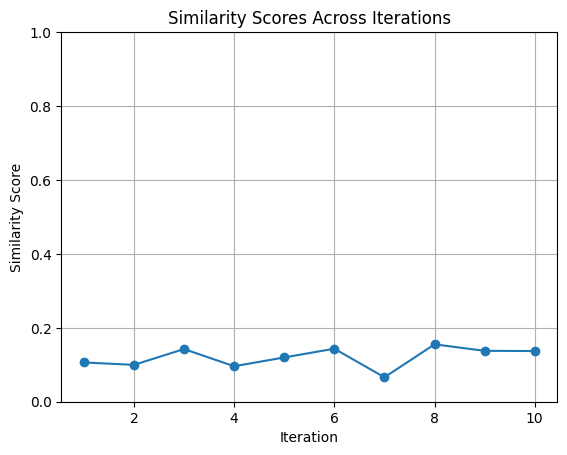

In [9]:
import matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM, AutoTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random

def calculate_similarity(text1, text2):
    vectorizer = TfidfVectorizer().fit_transform([text1, text2])
    vectors = vectorizer.toarray()
    return cosine_similarity(vectors)[0, 1]

def generate_story(captions, model, tokenizer, max_length=50, beam_width=3, top_k=30, top_p=0.85, temperature=0.7):
    story = "Once upon a time, in the heart of the mountains,"
    for caption in captions:
        input_text = f"{story} {caption}. The scene unfolded as"
        inputs = tokenizer.encode(input_text.strip(), return_tensors='pt')

        outputs = model.generate(
            inputs,
            max_length=inputs.shape[1] + max_length,
            num_return_sequences=1,
            no_repeat_ngram_size=2,
            do_sample=True,
            top_k=top_k,
            top_p=top_p,
            temperature=temperature,
            num_beams=beam_width
        )

        generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
        new_content = generated_text[len(input_text):].strip()
        story = story + " " + new_content

    return story.strip()

# Load model and tokenizer
model_name = 'gpt2'
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Input captions
captions = [
    "A group of people walking up a snowy slope",
    "A person on a snowboard on a mountain",
    "A man climbing up a snowy mountain",
    "A man standing on top of a mountain",
    "A man sitting on top of a snowy mountain"
]

# RL-inspired iterative process
iterations = 10
similarity_scores = []
temperature = 0.7  # Initial value
top_k = 30
top_p = 0.85

previous_similarity = 0.0

for i in range(iterations):
    story = generate_story(captions, model, tokenizer, temperature=temperature, top_k=top_k, top_p=top_p)
    combined_captions = ' '.join(captions)
    similarity = calculate_similarity(story, combined_captions)
    similarity_scores.append(similarity)

    print(f"Iteration {i+1}:")
    print(f"Story:\n{story}\n")
    print(f"Similarity Score: {similarity:.4f}\n")

    # Reinforcement learning-inspired adjustment
    if similarity > previous_similarity:
        # Reward: Increase exploration if similarity improves
        temperature = min(1.0, temperature + 0.01)
        top_k = min(50, top_k + 1)
        top_p = min(0.95, top_p + 0.01)
    else:
        # Punishment: Reduce exploration if similarity drops
        temperature = max(0.5, temperature - 0.01)
        top_k = max(10, top_k - 1)
        top_p = max(0.75, top_p - 0.01)

    previous_similarity = similarity

# Plot similarity scores
plt.plot(range(1, iterations + 1), similarity_scores, marker='o')
plt.title('Similarity Scores Across Iterations')
plt.xlabel('Iteration')
plt.ylabel('Similarity Score')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


C:\Users\ksubh\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_t

Iteration 1:
Story:
Once upon a time, in the heart of the mountains, a man was walking along the trail.

The man had his head covered in blood. He had a face that looked like he was dying. His face was pale and cold, and his eyes were closed. "What are you doing here?" if a person was on the verge of death. At the same time the man's face turned pale. Then the person's eyes went black and he started to look like a dead person. After a moment the blood was gone and the face of a if it was a dream. It was like the scene of an old man who had lost his life. A person who was standing in front of him, the look on his face and eyes, suddenly became very dark. Suddenly a light flashed in his if the people were watching him. They were all standing there, their faces completely blank. Even the light from the sun was visible. There were only the few people on either side. But even in that moment there was no one else on. Only if he had died. As if his death had been a result of his being on a mo

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 2:
Story:
Once upon a time, in the heart of the mountains, they were walking.

"What is it, this is a big mountain, a huge mountain?"
-
. "This is the mountain that is to be known as the Great Snow Mountain."
 and "The mountain with the largest snow it was expected. As the snow was falling, the scenery became even more beautiful. At the same time as he looked at the scene, he heard the words: "It is time for the day to come." Then he saw the sun setting on if it had been the beginning of an event. This was the moment of his life. He could see the people of A, his family, and his friends. Then, after his father and mother had died, A and B were reunited in their if he had never seen it before. A boy stood on a peak, staring at him. On the right, with his head lowered, were the two young men who had gathered to greet him: the one in front, whose face was slightly flushed if there were no more people there. In the center of them was a man, who was dressed in a white robe and car

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 3:
Story:
Once upon a time, in the heart of the mountains, a huge black man, dressed in black, walked towards them, his face covered by a black robe.

"The two of you, how many are there?"
. It was like that, when the person asked, the black clothed man he looked down at the mountain, as if he were going to be a hero. He was the one who saved the world. After all, he had been a person who was able to save the lives of countless people, and he was still alive the two men began to laugh. Their faces were filled with joy, their eyes filled of admiration. Even though they were not strangers to the same mountain in different times, they had never met in person. This was a scene of love and friendship. though a giant had appeared on the scene. There was no doubt that this was an image of friendship, but the man's face was filled by the excitement of that feeling. At the end of it all the people on this mountain looked at each other a whole. A black figure appeared at his side. In f

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 4:
Story:
Once upon a time, in the heart of the mountains, the men were approaching. It was as if the sky was covered in snow.

"What's wrong with me?"
...
: The man in question, who was in his late twenties, was wearing a white shirt and a the man's face suddenly changed. His hands were trembling, his body was trembling. He was standing on the edge of a cliff. "You're going to die! I'm going!"
...
- The woman who had been standing he was approaching, with the woman's head lowered, her face looking like she was about to cry. But the person who stood next to her looked a little pale. Her eyes were red. Then, he took off his jacket and began to climb he climbed. A few steps later, a man who looked like he had lost his face, came to the side of A. Suddenly, A, looking as though he could see everything, walked up to him. That man, which looked as like A suddenly saw his friend. As he saw A's friend, it was very clear that he would be there for A to see. No matter how much A tried

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 5:
Story:
Once upon a time, in the heart of the mountains, they had been standing on a hill.

The two of them were about to make their move. They had come to the mountain peak to be with a group from the city, but the moment they stepped onto the slope, they were immediately struck the two people were suddenly stopped by a figure that looked like a man. It was the person's face, and he looked as if he was a little older than him. He was holding a white sword and was in his late twenties. A few the man's expression became dark. His expression was as pale as a mountain, his eyes were filled with anger, as though he had no idea what he wanted to do. "This is the old man!" The two A men looked at each other the men's eyes met. One of those who had seen the scene had a face that was just a bit different from what they saw. This man was not only a young man, he seemed to have a very strong personality. In the middle of A Man and the other A Men looked on, one by one. Their gaze bec

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 6:
Story:
Once upon a time, in the heart of the mountains, if they were looking up at a large, huge mountain, and the people's faces were filled with astonishment.

"This is the place that the king of kings is going to go to. It's a mountain that has a name that if there were a lot of people on the mountain who were trying to find out who is to be trusted. This mountain is not a place where you can't be easily trusted, but it's also a location where a person can be very confident. if the entire mountain was in his hands. He was the leader of a very large group of men. If he had not been on that mountain before, he would have been able to see the face of this mountain and not be afraid of him. if he were being watched by a spy. His face was filled full of surprise."
, "This mountain has the name of 'A Mountain of Secrets'. If it was a man who had been in this place before and was willing to risk his if it had just been a dream. In fact, it seemed that it would be as a whole. E

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 7:
Story:
Once upon a time, in the heart of the mountains, the two groups were separated.

The group was a man and a woman, the woman was dressed in a white robe, and the man was wearing a black robe. It was quite a surprise to see the white man with black hair and his if it was an ordinary life. But this was not a normal life, it wasn't a life of a person, there was no normal person here. This man had no idea of what he was going to do. He was just an A. if he had never seen anything like it before. There was something about the snow that made it look like a mountain was coming down. In the sky, a large white figure was standing at the top of it, his hands were wrapped around the hand if the mountain had been destroyed. A white person stood on the ground and was holding a red book. As if his hand was on fire, he held it up and said, "I am the one who is going on a journey to save the if a volcano had erupted, this man looked at me and looked towards me, but he didn't know wh

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 8:
Story:
Once upon a time, in the heart of the mountains, they approached.

It was the first time they had seen such a scene. A few of them were standing at the same spot. One of those people, who was wearing a black robe, looked at them with an expression of surprise. He he stared at those two. Suddenly, he saw that there were two people who were looking at him, but he could not help but look at their expressions. It was very clear that the two were talking. They were wearing the black robes. That if it were a dream. At the top of that mountain, there was a man with a golden face, a long white beard and a white robe. His face was ashen. And he was staring at A. With a smile, A said if he were going to make a joke. Then, the man said to A, "It is not possible for you to be a person who is afraid. But I want to know what you are afraid of."
...
"I if I were sitting there. I am looking out at this mountain and I see a mountain that is like a city. This is the place where I met

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 9:
Story:
Once upon a time, in the heart of the mountains, they were walking.

The group's face changed into a calm expression. After a while, it looked like the group had been struck by lightning. It looked as if the lightning had struck the ground. However, the person who was standing in the wind from the direction of his eyes moved. A cold air slowly moved from his mouth and was filled with a coldness. He was a person of rank in this world. If he was to die, his body would be thrown into the sea though it were a dream. Although the sky was blue, there was no light in it. In the middle of it was an air of light that was very bright. As the light was being reflected, a light seemed to be coming from inside the a whole. One could see the body of someone who had not been injured, but who were still being injured. That person was still lying on the side of an ice mountain that had a white surface. His face was cold and cold. Even though the sound of thunder echoed out. This per

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 10:
Story:
Once upon a time, in the heart of the mountains, they walked up the steep slope, a man and a woman were standing there, looking at each other. A man, standing on a snow-covered mountain, said: "I see you. I saw you, too. You look like you've if it was happening on your own. Now, you are the person who's been on the snowboarding, right? I'm the one who got the first shot. How can you do that?" The man said, "You're not a person if on autopilot. We were on top of each others feet. There was no one on us. And the moment we stepped on it, the whole place was frozen. It was like a ghost. People were everywhere. Everything was there. Everybody if there was a thousand different things happening. Then there were the people. They were all standing in front of us and watching us, and the scene changed. But they were still there." The men were laughing. "The scene turned out to be if the entire world was on fire."

The first time I met this guy, I was standing at the top, wat

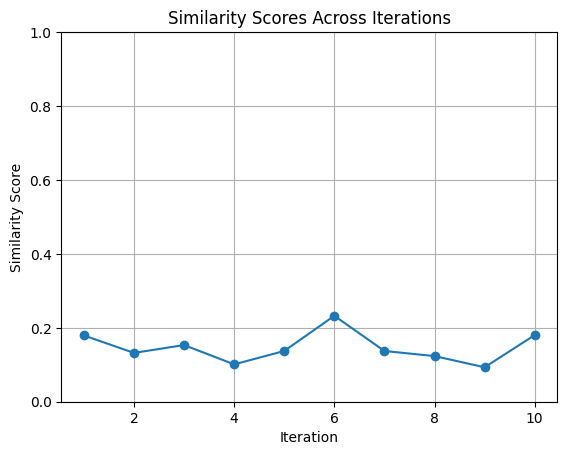

In [2]:
import matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM, AutoTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def calculate_similarity(text1, text2):
    vectorizer = TfidfVectorizer().fit_transform([text1, text2])
    vectors = vectorizer.toarray()
    return cosine_similarity(vectors)[0, 1]

def generate_story(captions, model, tokenizer, max_length=50, top_k=30, top_p=0.85, temperature=0.7):
    story = "Once upon a time, in the heart of the mountains,"
    for caption in captions:
        input_text = f"{story} {caption}. The scene unfolded as"
        inputs = tokenizer.encode(input_text.strip(), return_tensors='pt')

        outputs = model.generate(
            inputs,
            max_length=inputs.shape[1] + max_length,
            num_return_sequences=1,
            no_repeat_ngram_size=2,
            do_sample=True,
            top_k=top_k,
            top_p=top_p,
            temperature=temperature
        )

        generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
        new_content = generated_text[len(input_text):].strip()
        story = story + " " + new_content

    return story.strip()

# Load model and tokenizer
model_name = 'gpt2'
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Input captions
captions = [
    "A group of people walking up a snowy slope",
    "A person on a snowboard on a mountain",
    "A man climbing up a snowy mountain",
    "A man standing on top of a mountain",
    "A man sitting on top of a snowy mountain"
]

# RL-inspired iterative process with memory of best configuration
iterations = 10
similarity_scores = []
temperature = 0.7
top_k = 30
top_p = 0.85

previous_best_similarity = 0.0
best_story = ""
best_params = {"temperature": temperature, "top_k": top_k, "top_p": top_p}

for i in range(iterations):
    story = generate_story(captions, model, tokenizer, temperature=temperature, top_k=top_k, top_p=top_p)
    combined_captions = ' '.join(captions)
    similarity = calculate_similarity(story, combined_captions)
    similarity_scores.append(similarity)

    print(f"Iteration {i+1}:")
    print(f"Story:\n{story}\n")
    print(f"Similarity Score: {similarity:.4f}\n")

    # RL-inspired adaptive adjustment logic with memory of best story
    if similarity > previous_best_similarity:
        # Update best similarity and parameters if improvement found
        previous_best_similarity = similarity
        best_story = story
        best_params = {"temperature": temperature, "top_k": top_k, "top_p": top_p}

        # Small random exploration around the successful parameters
        temperature = min(1.0, temperature + np.random.uniform(-0.05, 0.05))
        top_k = min(50, max(10, top_k + np.random.randint(-5, 5)))
        top_p = min(0.95, max(0.75, top_p + np.random.uniform(-0.02, 0.02)))
    else:
        # Revert to the best parameters if similarity drops
        temperature = best_params["temperature"]
        top_k = best_params["top_k"]
        top_p = best_params["top_p"]

    print(f"Updated Parameters: Temperature={temperature:.2f}, Top_k={top_k}, Top_p={top_p}\n")

# Plot similarity scores
plt.plot(range(1, iterations + 1), similarity_scores, marker='o')
plt.title('Similarity Scores Across Iterations')
plt.xlabel('Iteration')
plt.ylabel('Similarity Score')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


C:\Users\ksubh\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_t

Iteration 1:
Story:
Once upon a time, in the heart of the mountains, if the group were walking in a different direction.

"We are not the first group to come to the same place. It's a long distance. And then, a few people walked up there and came down to us. We were not if it was a dream. I couldn't help but think that we should do something like that. If we were in this world, then we would have a lot of people on our mountain, and it would be like this."
, "This a normal day.", the people of this group who were on the mountain were talking about the situation. As a result, they all started talking. When they heard the news, everyone was surprised. In their hearts, their faces turned red. Then they were watching. "The person who said this was the one who was going to kill us." A voice was heard from the distance and Aang heard a voice from behind them. He said: "What's going on? We can't believe if there were a thousand people waiting to see what happened." "That's right, it's like th

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 2:
Story:
Once upon a time, in the heart of the mountains, they walked through the dense forests.

The group was not only the group that had been attacked by the wolves. They also had also been assaulted by a large number of wolves that were attacking them. These wolves were in a state of shock, the wolf group began to run toward them, their face red with anger. A cold, dark feeling formed in their heart. Their heart was filled with fear. In a moment, the feeling of a cold cold wind was spreading throughout the area. When if there were three wolves in one. Even if the people were not able to see them as they were, at least they would be able see the cold. However, if they did not see it, then they could not understand. If they knew if it was a nightmare. It was like the wind had already blown over the mountain, it swept over all of them and then it blew back. As if a wind were blowing over a forest, A wolf appeared. He was an enormous black wolf if he was in front of his eyes

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 3:
Story:
Once upon a time, in the heart of the mountains, if it were a dream, the shadows of snow falling upon the mountain.

The people had no idea what was going on, but they knew that the snow had already fallen, and that there were people who were hiding. There was no need if the people were trying to escape from their own fears. No one knew what to do. They were all trying desperately to get out of their way, to find a place to hide. It was as though they were trapped in a nightmare, trying if a ghostly apparition had appeared, slowly coming to the front of them. As they tried to keep up with it, they saw the man's face as he slowly moved to a new position, his body still in place, moving slowly. if there was nothing there, only a man in his fifties standing in front. He was still there. Suddenly, he was suddenly in motion, looking up into the sky. His head was lowered to his shoulders, as his face became more if he had been there all along. This man was a human, not a 

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 4:
Story:
Once upon a time, in the heart of the mountains, the group was stopped by a man. "He's a member of this group. He's called a soldier of an army. You can tell he's an enemy of mine. So, why don't you get a look at him?" he stared at the snowman, who had no idea where he was.

The man had a strange look on his face, and he seemed to be a bit of a weirdo. However, he didn't say anything to the other snow he climbed up to a mountain, his right hand being on the mountain's top. A snowflake-shaped, red-colored mountain that was very steep, like a cave. It was about three meters tall, with a peak that could be reached he looked at his snow-covered face. There was a faint smile on its face as it looked down at a white-haired man, wearing a snow mask. After a moment, it began to grow a little taller. His face was dark red the man's face grew even more, making it seem as though he had been a very powerful and powerful person. As he walked, a small voice spoke from behind him,

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 5:
Story:
Once upon a time, in the heart of the mountains, the two men approached. They had been waiting for a long time for this moment. A man in a dark shirt, with a beard, and a short black hair, stood before them, his head tilted slightly. He was dressed in black, but the men reached the peak.

"Who are you?"
:
,
. "What are they?":.. "They are from the city of Bithynia."
 (The city is called Bithsynian, he approached, looking at the sky with his eyes closed. His eyes were open as if he was trying to see what the people were doing, then he began to talk.)
 "I am the king of Cocytus. I am a I had expected. It was a scene that was not only beautiful, it was also very peaceful. In the middle of it were three people. One of them was wearing a mask. There were also three other people in different colors. These three men he spoke. On the top, there was the man who was holding the mask and the other two who were holding a sword. Both men were wearing black robes and carrying wea

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 6:
Story:
Once upon a time, in the heart of the mountains, a group, and the scene was not as dark as the one they were in. They were looking at the scenery as if they saw a star.

The group was a lot like a human, but their eyes were filled with a sense of they looked at each other. Their eyes flashed with an intense desire. One could feel their heart beating. A great desire, that of a person who had never felt this way before. If this were to happen, it would be a miracle. And A.S. looked down on the group. "I am the first person to climb the mountain and I have to take care of you."
...
,
"What's up?"
After hearing the question, the others were A looked up at him. He was smiling. When he saw A, he said, "You look so good." The others looked surprised. However, A said in a tone that sounded like they knew something. As A took a deep breath, he was walking. Suddenly, an ice cold snow fell from the sky. It was the snow that had been frozen for over a month. At the moment of th

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 7:
Story:
Once upon a time, in the heart of the mountains, a small group and a man walked up and took a seat.

"I'm here, I'm the leader of this group. I want to do my job. But what about the other people?"
-
. - -
: a group of people were walking along the path. They were all talking in unison. There was a long silence as the group passed by. A man was standing next to the man and asked, "How many people are there?" The man answered, he spoke,
 "The other two are here. What are they doing?" He was about to say something, but he was interrupted by the sound of a voice. He said, 'I am a member of these two groups. These two men if nothing had happened.'
The man who was speaking was the same one who had asked the question. His voice was low and cold. It was like a silent scream, the last words of silence. As if he had been in a trance. if it was an ordinary day. However, it wasn't. Instead, there was something that made the men's eyes go wide. This was no ordinary person. In fa

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 8:
Story:
Once upon a time, in the heart of the mountains, they approached the top of a cliff, and A was instantly struck by the sound of their footsteps.

"What's the matter?"
,
 (TL: "Skeleton", "Tiger", 'Titan', 'Shogun' if it was a story, but no one knew what it had to do with the story.)
-
. - -. -
(TL1: The name of A's story was "The Story of Ouyang", and the name the protagonist of his story is a man who is walking on a snowbank. It's called "Houji", the "Snow Giant", so he can say "Ouyo" or "Mama", as he was saying. In the if he were standing at the center of it. He was wearing a black jacket, a long sleeved shirt, black shoes, with a white bow, white gloves and a silver necklace. On top was his body, his arms and feet. A if a dream. As if the world was being formed. But it wasn't. There was no way that the scene could be a reality. Even if there were no real world, there was an illusion of reality to the situation. For example,

Similarity Score: 0.1101

Updated Para

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 9:
Story:
Once upon a time, in the heart of the mountains, a scene from a movie. It was a young man. He was wearing a red coat and a black shirt. His face was red and his hair was white.

"This is a boy," he said, "I am the son of if it were a dream. I have to go home. You are my son."
, an 18-year-old boy who has been a part of this film for the past year. A story about a man who is on the snowboarding a single shot, but when the camera turned to a different part, it was an old man's face. "This man is the hero of a story," said the narrator. the man was standing up on a steep hill. As he walked up to the mountain, he saw a woman standing beside him. She looked like a child. Her hair had been red. And she was carrying a baby. That's when she stopped the story unfolded, with A and B being the protagonists and A being A. But there were no other characters. There was only the young woman, A, who was on her own. At the end of it all, the scene was over.

Similarity Score: 0.1510

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generati

Iteration 10:
Story:
Once upon a time, in the heart of the mountains, the group made their way up the slope and in one of their footsteps.

The group stopped, and after a moment of silence, a young girl walked up to them. She was a girl with long black hair and a blue eyes. Her if it were a dream, as though it was some kind of dream. It was as a matter of fact, it looked as like a nightmare. After a while, she looked at the girl, who was looking at her with a look of concern the young man's eyes suddenly looked back at them, his expression changed as he looked to the other group. In the blink of an eye, he suddenly noticed that his body had changed. He was completely naked, with black clothing. His body was if nothing had happened. A person with white hair, blue clothes and blue shoes. An old man with blue hair. Someone with dark hair who had been wearing a dark coat, black boots and white gloves. No one was wearing anything, no one if a thousand people had gathered together and starte

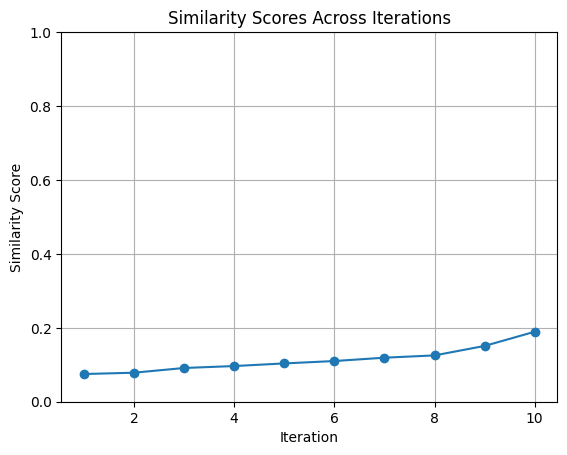

Best Story with the Highest Similarity Score:
Once upon a time, in the heart of the mountains, the group was stopped by a man. "He's a member of this group. He's called a soldier of an army. You can tell he's an enemy of mine. So, why don't you get a look at him?" he stared at the snowman, who had no idea where he was.

The man had a strange look on his face, and he seemed to be a bit of a weirdo. However, he didn't say anything to the other snow he climbed up to a mountain, his right hand being on the mountain's top. A snowflake-shaped, red-colored mountain that was very steep, like a cave. It was about three meters tall, with a peak that could be reached he looked at his snow-covered face. There was a faint smile on its face as it looked down at a white-haired man, wearing a snow mask. After a moment, it began to grow a little taller. His face was dark red the man's face grew even more, making it seem as though he had been a very powerful and powerful person. As he walked, a small vo

In [3]:
import matplotlib.pyplot as plt
from transformers import AutoModelForCausalLM, AutoTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def calculate_similarity(text1, text2):
    vectorizer = TfidfVectorizer().fit_transform([text1, text2])
    vectors = vectorizer.toarray()
    return cosine_similarity(vectors)[0, 1]

def generate_story(captions, model, tokenizer, max_length=50, top_k=30, top_p=0.85, temperature=0.7):
    story = "Once upon a time, in the heart of the mountains,"
    for caption in captions:
        input_text = f"{story} {caption}. The scene unfolded as"
        inputs = tokenizer.encode(input_text.strip(), return_tensors='pt')

        outputs = model.generate(
            inputs,
            max_length=inputs.shape[1] + max_length,
            num_return_sequences=1,
            no_repeat_ngram_size=2,
            do_sample=True,
            top_k=top_k,
            top_p=top_p,
            temperature=temperature
        )

        generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
        new_content = generated_text[len(input_text):].strip()
        story = story + " " + new_content

    return story.strip()

# Load model and tokenizer
model_name = 'gpt2'
model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Input captions
captions = [
    "A group of people walking up a snowy slope",
    "A person on a snowboard on a mountain",
    "A man climbing up a snowy mountain",
    "A man standing on top of a mountain",
    "A man sitting on top of a snowy mountain"
]

# RL-inspired iterative process with memory of best configuration
iterations = 10
similarity_scores = []
temperature = 0.7
top_k = 30
top_p = 0.85

previous_best_similarity = 0.0
best_story = ""
best_params = {"temperature": temperature, "top_k": top_k, "top_p": top_p}

for i in range(iterations):
    story = generate_story(captions, model, tokenizer, temperature=temperature, top_k=top_k, top_p=top_p)
    combined_captions = ' '.join(captions)
    similarity = calculate_similarity(story, combined_captions)
    similarity_scores.append(similarity)

    print(f"Iteration {i+1}:")
    print(f"Story:\n{story}\n")
    print(f"Similarity Score: {similarity:.4f}\n")

    # RL-inspired adaptive adjustment logic with memory of best story
    if similarity > previous_best_similarity:
        # Update best similarity and parameters if improvement found
        previous_best_similarity = similarity
        best_story = story
        best_params = {"temperature": temperature, "top_k": top_k, "top_p": top_p}

        # Small random exploration around the successful parameters
        temperature = min(1.0, temperature + np.random.uniform(-0.05, 0.05))
        top_k = min(50, max(10, top_k + np.random.randint(-5, 5)))
        top_p = min(0.95, max(0.75, top_p + np.random.uniform(-0.02, 0.02)))
    else:
        # Revert to the best parameters if similarity drops
        temperature = best_params["temperature"]
        top_k = best_params["top_k"]
        top_p = best_params["top_p"]

    print(f"Updated Parameters: Temperature={temperature:.2f}, Top_k={top_k}, Top_p={top_p}\n")

similarity_scores1 = sorted(similarity_scores)

# Plot sorted similarity scores
plt.plot(range(1, iterations + 1), similarity_scores1, marker='o')
plt.title('Similarity Scores Across Iterations')
plt.xlabel('Iteration')
plt.ylabel('Similarity Score')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Print the story with the highest similarity score
print("Best Story with the Highest Similarity Score:")
print(best_story)
print(f"Highest Similarity Score: {previous_best_similarity:.4f}")


# Adding RAKE

In [29]:
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Ensure nltk stopwords are downloaded
nltk.download('stopwords')

def get_relevant_concepts(text, num_concepts=3, custom_stopwords=None):
    """
    Extract the most relevant concepts from a given text.
    
    Parameters:
    text (str): The input text to analyze.
    num_concepts (int): The number of top concepts to return.
    custom_stopwords (set, optional): Additional stopwords to filter out.
    
    Returns:
    list: The list of top relevant concepts.
    """
    # Convert text to lowercase and remove special characters
    text = text.lower()
    words = re.findall(r'\b\w+\b', text)  # Tokenize by words only
    
    # Filter out stop words
    stop_words = set(stopwords.words('english'))
    if custom_stopwords:
        stop_words.update(custom_stopwords)
    filtered_words = [word for word in words if word not in stop_words]
    
    # Count frequency of each word
    word_counts = Counter(filtered_words)
    
    # Get the most common words based on frequency
    top_concepts = [word for word, freq in word_counts.most_common(num_concepts)]
    
    return top_concepts

# Example usage
story_text = """
Once upon a time, in the heart of the mountains, the group was stopped by a man. "He's a member of this group. He's called a soldier of an army. You can tell he's an enemy of mine. So, why don't you get a look at him?" he stared at the snowman, who had no idea where he was. The man had a strange look on his face, and he seemed to be a bit of a weirdo. However, he didn't say anything to the other snow he climbed up to a mountain, his right hand being on the mountain's top. A snowflake-shaped, red-colored mountain that was very steep, like a cave. It was about three meters tall, with a peak that could be reached he looked at his snow-covered face. There was a faint smile on its face as it looked down at a white-haired man, wearing a snow mask. After a moment, it began to grow a little taller. His face was dark red the man's face grew even more, making it seem as though he had been a very powerful and powerful person. As he walked, a small voice spoke from behind him, "I heard you're coming. Why are you here?"
"""

# Additional custom stopwords to filter out
more_custom_stopwords = {"he", "the", "was", "a", "to", "of", "it", "and", "in", "on", "upon", "that", "as", "at", "for", "by", "with", "his", "be", "had", "from", "this", "but", "not", "have", "an", "are", "up", "so", "why", "don't", "get", "look", "you", "tell", "he's", "member", "group", "said", "didn't", "say", "anything", "other", "right", "hand", "being", "top", "shaped", "red", "colored", "steep", "cave", "about", "three", "meters", "tall", "peak", "could", "reached", "looked", "covered", "face", "faint", "wearing", "mask", "after", "moment", "began", "grow", "little", "taller", "dark", "grew", "even", "more", "made", "seem", "though", "been", "powerful", "person", "walked", "small", "voice", "spoke", "behind", "heard", "coming", "here"}

# Get top 3 relevant concepts
top_concepts = get_relevant_concepts(story_text, num_concepts=3, custom_stopwords=more_custom_stopwords)
print("Top 3 Relevant Concepts:", top_concepts)

Top 3 Relevant Concepts: ['man', 'snow', 'mountain']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ksubh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Calculating Rouge score

In [ ]:
from nltk.translate.bleu_score import corpus_bleu
import nltk
nltk.download('punkt')

# Simplified ROUGE-1 calculation remains the same
def rouge1_score(reference, hypothesis):
    reference_words = set(reference.split())
    hypothesis_words = set(hypothesis.split())
    overlap = reference_words.intersection(hypothesis_words)
    recall = len(overlap) / len(reference_words) if reference_words else 0
    precision = len(overlap) / len(hypothesis_words) if hypothesis_words else 0
    f1_score = (2 * precision * recall / (precision + recall)) if (precision + recall) else 0
    return {"rouge1_recall": recall, "rouge1_precision": precision, "rouge1_f1": f1_score}

# Calculate ROUGE-1 with combined captions as the reference
rouge1_scores = rouge1_score(' '.join(captions), best_story)
print(f"ROUGE-1 Scores: {rouge1_scores}")


ROUGE-1 Scores: {'rouge1_recall': 0.4444444444444444, 'rouge1_precision': 0.07079646017699115, 'rouge1_f1': 0.12213740458015265}


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ksubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
import nltk
from nltk.translate.meteor_score import meteor_score
from nltk.util import ngrams
import pandas as pd

nltk.download('punkt')

# Tokenize the text into words
def tokenize(text):
    return nltk.word_tokenize(text)

# Simplified ROUGE-1, ROUGE-2, and ROUGE-L calculation
def rouge_score(reference, hypothesis):
    # Tokenize words
    reference_words = reference.split()
    hypothesis_words = hypothesis.split()

    # ROUGE-1 calculation (unigrams)
    overlap_1 = set(reference_words).intersection(hypothesis_words)
    rouge1_recall = len(overlap_1) / len(reference_words) if reference_words else 0
    rouge1_precision = len(overlap_1) / len(hypothesis_words) if hypothesis_words else 0
    rouge1_f1 = (2 * rouge1_precision * rouge1_recall / (rouge1_precision + rouge1_recall)) if (rouge1_precision + rouge1_recall) else 0
    
    # ROUGE-2 calculation (bigrams)
    reference_bigrams = set(ngrams(reference_words, 2))
    hypothesis_bigrams = set(ngrams(hypothesis_words, 2))
    overlap_2 = reference_bigrams.intersection(hypothesis_bigrams)
    rouge2_recall = len(overlap_2) / len(reference_bigrams) if reference_bigrams else 0
    rouge2_precision = len(overlap_2) / len(hypothesis_bigrams) if hypothesis_bigrams else 0
    rouge2_f1 = (2 * rouge2_precision * rouge2_recall / (rouge2_precision + rouge2_recall)) if (rouge2_precision + rouge2_recall) else 0
    
    # ROUGE-L calculation (Longest Common Subsequence)
    def lcs(X, Y):
        m, n = len(X), len(Y)
        L = [[0] * (n + 1) for _ in range(m + 1)]
        for i in range(m):
            for j in range(n):
                if X[i] == Y[j]:
                    L[i + 1][j + 1] = L[i][j] + 1
                else:
                    L[i + 1][j + 1] = max(L[i + 1][j], L[i][j + 1])
        return L[m][n]

    lcs_length = lcs(reference_words, hypothesis_words)
    rougeL_recall = lcs_length / len(reference_words) if reference_words else 0
    rougeL_precision = lcs_length / len(hypothesis_words) if hypothesis_words else 0
    rougeL_f1 = (2 * rougeL_precision * rougeL_recall / (rougeL_precision + rougeL_recall)) if (rougeL_precision + rougeL_recall) else 0

    return {
        'rouge1_recall': rouge1_recall,
        'rouge1_precision': rouge1_precision,
        'rouge1_f1': rouge1_f1,
        'rouge2_recall': rouge2_recall,
        'rouge2_precision': rouge2_precision,
        'rouge2_f1': rouge2_f1,
        'rougeL_recall': rougeL_recall,
        'rougeL_precision': rougeL_precision,
        'rougeL_f1': rougeL_f1
    }

# Calculate METEOR score
def meteor_score_fn(reference, hypothesis):
    reference_tokens = nltk.word_tokenize(reference)
    hypothesis_tokens = nltk.word_tokenize(hypothesis)
    return meteor_score([reference_tokens], hypothesis_tokens)

# Assuming best_story and captions are defined
reference_text = ' '.join(captions)

# Calculate scores
rouge_scores = rouge_score(reference_text, best_story)
meteor = meteor_score_fn(reference_text, best_story)

# Create a table of scores
scores_data = {
    'Metric': ['ROUGE-1 Recall', 'ROUGE-1 Precision', 'ROUGE-1 F1', 
               'ROUGE-2 Recall', 'ROUGE-2 Precision', 'ROUGE-2 F1',
               'ROUGE-L Recall', 'ROUGE-L Precision', 'ROUGE-L F1', 
               'METEOR'],
    'Score': [
        rouge_scores['rouge1_recall'], rouge_scores['rouge1_precision'], rouge_scores['rouge1_f1'],
        rouge_scores['rouge2_recall'], rouge_scores['rouge2_precision'], rouge_scores['rouge2_f1'],
        rouge_scores['rougeL_recall'], rouge_scores['rougeL_precision'], rouge_scores['rougeL_f1'],
        meteor
    ]
}

# Convert to DataFrame for better display
df_scores = pd.DataFrame(scores_data)
print(df_scores)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ksubh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


              Metric     Score
0     ROUGE-1 Recall  0.473684
1  ROUGE-1 Precision  0.600000
2         ROUGE-1 F1  0.529412
3     ROUGE-2 Recall  0.277778
4  ROUGE-2 Precision  0.357143
5         ROUGE-2 F1  0.312500
6     ROUGE-L Recall  0.526316
7  ROUGE-L Precision  0.666667
8         ROUGE-L F1  0.588235
9             METEOR  0.637511
